## Tema 3: Naive-bayes y KNN Aprendizaje automático

### Autor: José Miguel

### Prácticas Naive Bayes y KNN (ejercicio 4)

##### **4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.**


#### 1. Carga de datos desde el csv
Cargaremos los datos desde el dataset proporcionado.

In [16]:
import pandas as pd

df_data = pd.read_csv('csv/winequality-red.csv')
df_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2. Preprocesamiento de datos
#### 2.1. Remodelar columnas para quitar espacios en el nombre

In [17]:
# devuelva una lista del nombre de las columnas
columns_names = df_data.columns.tolist()

# quitar el espacio en blanco y asignarlo nuevamente
columns_names = [c.replace(' ', '_') for c in columns_names]
df_data.columns = columns_names

df_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### 3. Crear los entrenamientos, y el test

In [18]:
# Dividiremos el df_final en un conjunto de datos de test y entrenamiento
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.33

X = df_data[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                    'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

#### 4. Construcción y análisis del modelo con knn regressor

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Constantes para el modelo
K = 10
# en el ejercicio 3 se calculo la precisión y salió distancia la que más
WEIGHTS = 'distance'

# Crear el modelo
model = KNeighborsRegressor(n_neighbors=K, weights=WEIGHTS)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular la precisión
mean_squared_error(y_pred, y_test)

print('MSE: ', mean_squared_error(y_pred, y_test))

MSE:  0.4764566437184487


#### 5. Visualización del modelo y los datos obtenidos

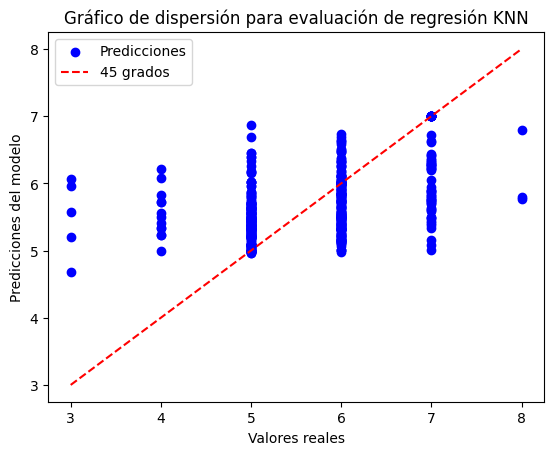

In [20]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

# Dibujar la línea de 45 grados para comparación
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='45 grados')

# Etiquetas y título
plt.xlabel('Valores reales')
plt.ylabel('Predicciones del modelo')
plt.title('Gráfico de dispersión para evaluación de regresión KNN')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

##### Podemos observar que este tipo de modelo para datos que no están muy dispersos, no es muy bueno usarlo habría que usar el de clasificación.